In [1]:
from math import sqrt

import numpy as np

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import skimage
from skimage import io, exposure, img_as_float, img_as_ubyte, morphology, filters, util
from skimage.color import rgb2gray, label2rgb
from skimage.feature import canny, blob_dog, blob_log, blob_doh,  peak_local_max
from skimage.filters import sobel, threshold_otsu, try_all_threshold, threshold_local, threshold_minimum
from skimage.segmentation import clear_border, watershed, random_walker
from skimage.measure import label, regionprops
from skimage.measure import label, regionprops
from skimage.color import label2rgb
from skimage.morphology import closing

import cv2

from scipy import ndimage as ndi
from scipy.stats import norm

import os

import statistics

import plotly.graph_objs as go

import pickle
import math

%store -r areaum2p5o
%store -r areaum5o
%store -r areaum10o

In [2]:
#2.5, Sheet = 0,3

df2p5 = pd.read_excel('/Users/carolinemccue/Dropbox (MIT)/Project_ReversibleCellAdhesion_Broad/Manual Cell Counting/Manual Cell Counting.xlsx', sheet_name = 0, header = 0)
filename2p5 = df2p5['File name']
num_postsint2p5 = df2p5['Number of internal posts 1']
num_postsedge2p5 = df2p5['Number of edge posts 1']
num_posts2p5 = df2p5['Total number of posts 1']
df2p5['Area'] = areaum2p5o


dfnew2p5 = df2p5[num_posts2p5 != 0]

posts2p5 = dfnew2p5['Total number of posts 1']
area2p5 = dfnew2p5['Area']

dfnew2p5.head(5)


,File name,Number of internal posts 1,Number of edge posts 1,Total number of posts 1,Unnamed: 4,Number of internal posts 2,Number of edge posts 2,Total number of posts 2,Unnamed: 8,Number of internal posts,Number of edge posts,Total number of posts,Area
17,r01c01f27p01-ch2sk1fk1fl1_cell_17,14.0,5.0,19,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,107.346580
18,r01c01f27p01-ch2sk1fk1fl1_cell_18,7.0,13.0,20,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,107.762652
23,r01c01f27p01-ch2sk1fk1fl1_cell_23,16.0,7.0,23,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,109.010868
25,r01c01f27p01-ch2sk1fk1fl1_cell_25,10.0,9.0,19,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,109.010868
31,r01c01f27p01-ch2sk1fk1fl1_cell_31,16.0,4.0,20,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,109.843012


In [3]:
#5, Sheet = 1,4

df5 = pd.read_excel('/Users/carolinemccue/Dropbox (MIT)/Project_ReversibleCellAdhesion_Broad/Manual Cell Counting/Manual Cell Counting.xlsx', sheet_name = 1, header = 0)
filename5 = df5['File name']
num_postsint5 = df5['Number of internal posts']
num_postsedge5 = df5['Number of edge posts']
num_posts5 = df5['Total number of posts']
df5['Area'] = areaum5o


dfnew5 = df5[num_posts5 != 0]

posts5 = dfnew5['Total number of posts']
area5 = dfnew5['Area']

dfnew5.head(5)


,File name,Number of internal posts 1,Number of edge posts 1,Total number of posts 1,Unnamed: 4,Number of internal posts 2,Number of edge posts 2,Total number of posts 2,Unnamed: 8,Number of internal posts,Number of edge posts,Total number of posts,Area
0,r01c02f26p03-ch2sk1fk1fl1_cell_0,2.0,5.0,7,NaN,2.0,6.0,8,NaN,2.0,5.5,7.5,200.130639
1,r01c02f26p03-ch2sk1fk1fl1_cell_1,3.0,6.0,9,NaN,4.0,9.0,13,NaN,3.5,7.5,11.0,200.546711
8,r01c02f26p03-ch2sk1fk1fl1_cell_8,2.0,2.0,4,NaN,3.0,1.0,4,NaN,2.5,1.5,4.0,211.364584
12,r01c02f26p03-ch2sk1fk1fl1_cell_12,0.0,6.0,6,NaN,1.0,6.0,7,NaN,0.5,6.0,6.5,214.277088
13,r01c02f26p03-ch2sk1fk1fl1_cell_13,6.0,4.0,10,NaN,7.0,4.0,11,NaN,6.5,4.0,10.5,215.941376


In [4]:
#10, Sheet = 2,5

df10 = pd.read_excel('/Users/carolinemccue/Dropbox (MIT)/Project_ReversibleCellAdhesion_Broad/Manual Cell Counting/Manual Cell Counting.xlsx', sheet_name = 2, header = 0)
filename10 = df10['File name']
num_postsint10 = df10['Number of internal posts 1']
num_postsedge10 = df10['Number of edge posts 1']
num_posts10 = df10['Total number of posts 1']
df10['Area'] = areaum10o

dfnew10 = df10[num_posts10 != 0]

posts10 = dfnew10['Total number of posts 1']
area10 = dfnew10['Area']

dfnew10.head(5)


,File name,Number of internal posts 1,Number of edge posts 1,Total number of posts 1,Unnamed: 4,Number of internal posts 2,Number of edge posts 2,Total number of posts 2,Unnamed: 8,Number of internal posts,Number of edge posts,Total number of posts,Area
15,r01c03f60p02-ch2sk1fk1fl1_cell_15,3.0,1.0,4,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,148.953781
27,r01c03f60p02-ch2sk1fk1fl1_cell_27,2.0,5.0,7,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,157.275222
80,r01c03f60p02-ch2sk1fk1fl1_cell_80,2.0,4.0,6,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,199.298495
82,r01c03f60p02-ch2sk1fk1fl1_cell_82,2.0,2.0,4,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,200.546711
86,r01c03f60p02-ch2sk1fk1fl1_cell_86,2.0,3.0,5,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,204.291359


In [5]:
len(posts2p5), len(posts5), len(posts10), len(area2p5), len(area5), len(area10)

(61, 71, 55, 61, 71, 55)

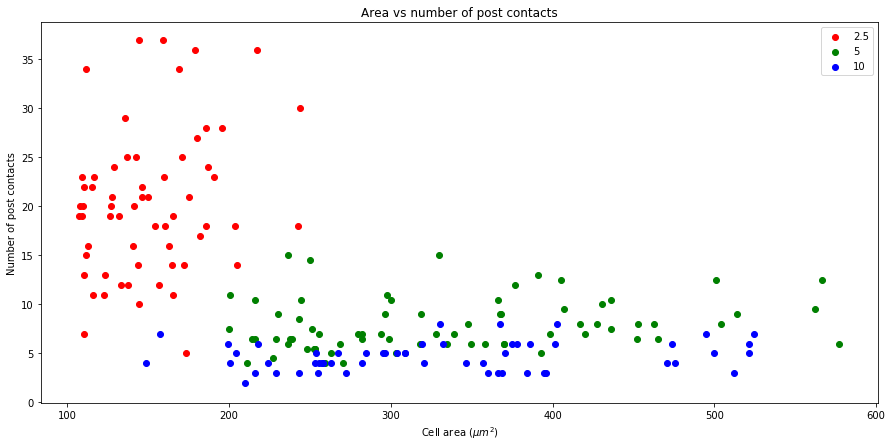

In [6]:
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)

plt.scatter(area2p5, posts2p5, color='r', label='2.5')
plt.scatter(area5, posts5, color='g', label='5')
plt.scatter(area10, posts10, color='b', label='10')

ax.set_xlabel('Cell area ($\mu m^2$)')
ax.set_ylabel('Number of post contacts')
ax.set_title('Area vs number of post contacts')
plt.legend()
     
# show plot
plt.show()

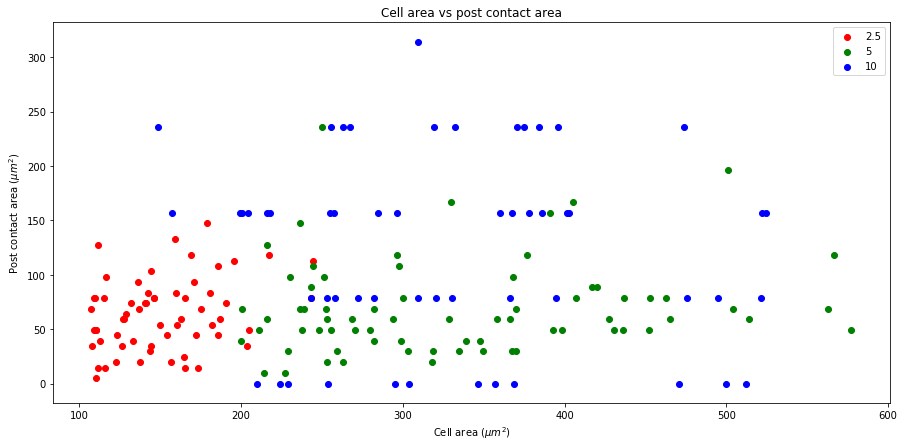

In [7]:
pi = math.pi
postsarea2p5 = dfnew2p5['Number of internal posts 1'] * (pi * 1.25 **2)
postsarea5 = dfnew5['Number of internal posts'] * (pi * 2.5 **2)
postsarea10 = dfnew10['Number of internal posts 1'] * (pi * 5 **2)

fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)

plt.scatter(area2p5, postsarea2p5, color='r', label='2.5')
plt.scatter(area5, postsarea5, color='g', label='5')
plt.scatter(area10, postsarea10, color='b', label='10')

ax.set_xlabel('Cell area ($\mu m^2$)')
ax.set_ylabel('Post contact area ($\mu m^2$)')
ax.set_title('Cell area vs post contact area')
plt.legend()
     
# show plot
plt.show()

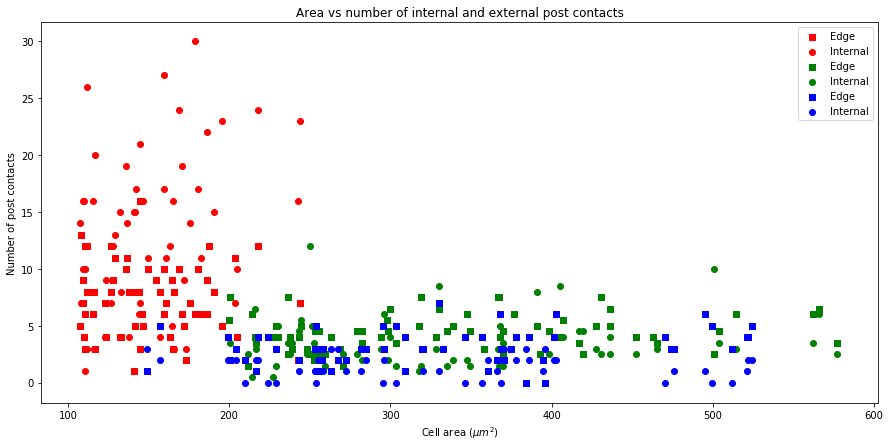

In [8]:
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)

plt.scatter(area2p5, dfnew2p5['Number of edge posts 1'], color='r', marker = ',', label='Edge')
plt.scatter(area2p5, dfnew2p5['Number of internal posts 1'], color='r', label='Internal')
plt.scatter(area5, dfnew5['Number of edge posts'], color='g', marker = ',', label='Edge')
plt.scatter(area5, dfnew5['Number of internal posts'], color='g', label='Internal')
plt.scatter(area10, dfnew10['Number of edge posts 1'], color='b', marker = ',', label='Edge')
plt.scatter(area10, dfnew10['Number of internal posts 1'], color='b', label='Internal')


ax.set_xlabel('Cell area ($\mu m^2$)')
ax.set_ylabel('Number of post contacts')
ax.set_title('Area vs number of internal and external post contacts')
plt.legend()
     
# show plot
plt.show()

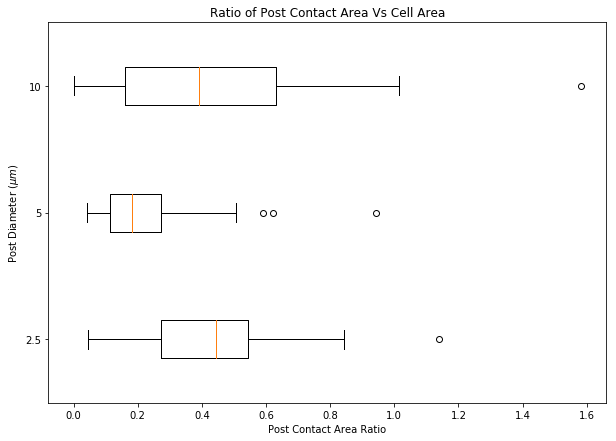

In [9]:
postarearatio2p5 = postsarea2p5 / area2p5
postarearatio5 = postsarea5 / area5
postarearatio10 = postsarea10 / area10

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

postarearatio = [postarearatio2p5, postarearatio5, postarearatio10]

bp = ax.boxplot(postarearatio, vert = 0)

ax.set_xlabel('Post Contact Area Ratio')
ax.set_ylabel('Post Diameter ($\mu m$)')
ax.set_yticklabels(['2.5', '5', '10'])
ax.set_title('Ratio of Post Contact Area Vs Cell Area')

     
# show plot
plt.show()

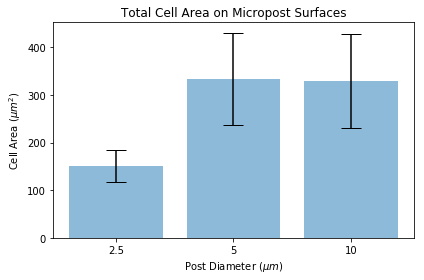

In [10]:
postsize = ['2.5', '5', '10']
x = np.arange(len(postsize))
y = [area2p5.mean(), area5.mean(), area10.mean()]
errory = [area2p5.std(), area5.std(), area10.std()]

fig, ax = plt.subplots()
ax.bar(x, y, yerr = errory, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Cell Area ($\mu m^2$)')
ax.set_xticks(x)
ax.set_xticklabels(postsize)
ax.set_xlabel('Post Diameter ($\mu m$)')
ax.set_title('Total Cell Area on Micropost Surfaces')


# Save the figure and show
plt.tight_layout()
plt.savefig('Cell Area on Microposts')
plt.show()